<a href="https://colab.research.google.com/github/LeandroCoelhos/exemplos_modelos/blob/main/Titanic_Prep_Feature_Importance_KNNImput_Tunagem_Combina%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/test.csv'
treino = pd.read_csv(url1)
teste = pd.read_csv(url2) 

n = treino.shape[0]#DEFINE ATÉ ONDE VAI O CONJUNTO DE TREINO

In [ ]:
targets = list(treino['Survived']) #atribuição a variável resposta em uma lista separada
len(targets)

891

In [ ]:
#Facilita para aplicar as normalizações e mudanças de variáveis no treino e no teste ao mesmo tempo
dataset = pd.concat([treino, teste]) 

In [ ]:
# mapeando o sexo em 0 e 1 no data set completo, evita ter que fazer uma etapa para treino e outra para teste
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}) 

In [ ]:
# tranformação de variavel: pegar apenas o titulo presente no nome
def aux(x):
    return x.split(', ')[1].split('. ')[0]

dataset['Titulo'] = dataset['Name'].apply(aux)

In [ ]:
#agrupnando as categorias e mapeando-a
#busca por mais informações sobre os dados podem gerar melhores resultados
titulos = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

dataset['Titulacao'] = dataset['Titulo'].map(titulos)

In [ ]:
dataset['Survived'].groupby(dataset['Titulacao']).describe()

,count,mean,std,min,25%,50%,75%,max
Titulacao,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.00,1.0
Miss,184.0,0.701087,0.459031,0.0,0.0,1.0,1.00,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.00,1.0
Mrs,127.0,0.795276,0.405098,0.0,1.0,1.0,1.00,1.0
Officer,18.0,0.277778,0.460889,0.0,0.0,0.0,0.75,1.0
Royalty,5.0,0.600000,0.547723,0.0,0.0,1.0,1.00,1.0


In [ ]:
# variavel Cabine
dataset['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [ ]:
# tranformação de variavel: pegar apenas a primeira letra da variavel Cabin, para identificar os nulos e os preenchidos, sabendo qual categoria ela pertence
def aux(x):
    return list(str(x))[0]

dataset['Cabin'] = dataset['Cabin'].apply(aux) 

In [ ]:
dataset['Familia'] = dataset['SibSp'] + dataset['Parch'] + 1 

In [ ]:
#defifindo o tamanho da família
#categorizar o tamanho da família pode ajudar nos resultados
def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

dataset['FamiliaTipo'] = dataset['Familia'].apply(aux) #aplica diretamente em todo o dataset

FamiliaTipo
Grande     0.161290
Pequena    0.578767
Sozinho    0.303538
Name: Survived, dtype: float64

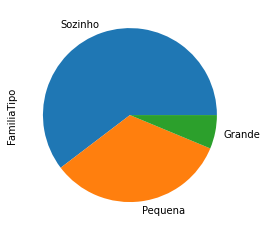

In [ ]:
dataset['FamiliaTipo'].value_counts().plot(kind = 'pie')

dataset['Survived'].groupby(dataset['FamiliaTipo']).mean()

In [ ]:
# Dropando Variaveis que não serão mais utilizadas por terem sido substituidas
variaveis = ['PassengerId', 'Name', 'Ticket', 'Titulo']
dataset.drop(variaveis, axis = 1, inplace = True)

In [ ]:
dataset.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titulacao,Familia,FamiliaTipo
0,0.0,3,0,22.0,1,0,7.25,n,S,Mr,2,Pequena


In [ ]:
# Dummificação de várias variáveis de uma unica vez
dummificar = ['Pclass', 'Cabin', 'Embarked', 'Titulacao', 'FamiliaTipo']#lista de variáveis a serem dumificadas
dataset = pd.get_dummies(dataset, columns = dummificar) #função do pandas que faz a dumificação em massa

In [ ]:
dataset.head(1)

,Survived,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,...,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,0,22.0,1,0,7.25,2,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
dataset.isnull().sum()

Survived               418
Sex                      0
Age                    263
SibSp                    0
Parch                    0
Fare                     1
Familia                  0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Cabin_A                  0
Cabin_B                  0
Cabin_C                  0
Cabin_D                  0
Cabin_E                  0
Cabin_F                  0
Cabin_G                  0
Cabin_T                  0
Cabin_n                  0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
Titulacao_Master         0
Titulacao_Miss           0
Titulacao_Mr             0
Titulacao_Mrs            0
Titulacao_Officer        0
Titulacao_Royalty        0
FamiliaTipo_Grande       0
FamiliaTipo_Pequena      0
FamiliaTipo_Sozinho      0
dtype: int64

# Imlput de dados Faltantes

In [ ]:
#IMPUTAÇÂO COM KNN em todas os dados faltantes
from sklearn.impute import KNNImputer 

imputer = KNNImputer()#cria um objeto com a instancia KnnImputer

knnimp = imputer.fit(dataset.loc[:n-1, :].drop('Survived', axis = 1))#Faz o treinamento com os dados de treinamento

knnimp = imputer.transform(dataset.drop('Survived', axis = 1))#faz o preenchimento no conjutno de treino

In [ ]:
knnimp #este é o data set em formato de numpy array, precisa tranformar em data frame para retornar ao formato original

array([[ 0. , 22. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 38. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 26. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 28.6,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 16.6,  1. , ...,  0. ,  1. ,  0. ]])

In [ ]:
dataset = pd.DataFrame(knnimp, columns = dataset.columns[1:]) #tranforma novamente em um data frame preenchendo as lacunas
#columns para pegar de volta o nome das colunas que haviam se perdido na imputação

In [ ]:
 dataset.isnull().sum()

Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Familia                0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Cabin_A                0
Cabin_B                0
Cabin_C                0
Cabin_D                0
Cabin_E                0
Cabin_F                0
Cabin_G                0
Cabin_T                0
Cabin_n                0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
Titulacao_Master       0
Titulacao_Miss         0
Titulacao_Mr           0
Titulacao_Mrs          0
Titulacao_Officer      0
Titulacao_Royalty      0
FamiliaTipo_Grande     0
FamiliaTipo_Pequena    0
FamiliaTipo_Sozinho    0
dtype: int64

In [ ]:
#separa novamente o conjunto em treino e teste, depois de todas as modificações feitas
#a variável resposta do treino esta na Target, separada do conjunto
treino = dataset.loc[:n-1, :]
teste = dataset.loc[n:, :]

In [ ]:
treino.shape

(891, 30)

In [ ]:
#faz a normalização subtraindo a média e dividindo pelo desvio padrão para ficar entre -2 e 2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

aux0 = sc.fit_transform(treino[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])#cria novas colunas idade e tarifa normalizadas
treino = pd.concat([treino, aux1], axis = 1)#adiciona ao conunto de treino
treino.drop(['Age', 'Fare'], axis = 1, inplace = True) #deleta as colunas antigas não padronizadas

In [ ]:
#faz o vamaento de dados para o conjunto de teste, aplicando as mesmas etapas acima 
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = teste.reset_index()
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare', 'index'], axis = 1, inplace = True) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
modelo_base = RandomForestClassifier(max_depth=3) 
modelo_base.fit(treino, targets) 

RandomForestClassifier(max_depth=3)

In [ ]:
#Array que mostra a importância de cada variável usada para contruir o modelo
modelo_base.feature_importances_

array([2.13455552e-01, 1.39545877e-02, 7.41837144e-03, 3.54359087e-02,
       3.66762296e-02, 3.60221611e-03, 6.48836474e-02, 0.00000000e+00,
       4.04949235e-03, 2.90838214e-03, 6.02886816e-03, 9.35160598e-03,
       8.46159596e-05, 3.42051715e-04, 4.76713662e-05, 4.69407187e-02,
       7.05257359e-03, 2.22304743e-03, 9.18308692e-03, 6.62730611e-03,
       8.72878811e-02, 2.49542711e-01, 6.59430480e-02, 1.61297554e-03,
       1.63105330e-04, 1.62974193e-02, 2.46276044e-02, 9.98932120e-03,
       2.15708729e-02, 5.26991283e-02])

In [ ]:
variaveis = pd.DataFrame()#tranforma em um data frame para melhor visualização
variaveis['variavel'] = treino.columns#pega os nome das colunas
variaveis['importância'] = modelo_base.feature_importances_#atribui os valores
variaveis.sort_values(by = "importância", ascending = False)#organiza por ordem decrescente de importância

,variavel,importância
21,Titulacao_Mr,0.249543
0,Sex,0.213456
20,Titulacao_Miss,0.087288
22,Titulacao_Mrs,0.065943
6,Pclass_3,0.064884
29,Tarifa,0.052699
15,Cabin_n,0.046941
4,Pclass_1,0.036676
3,Familia,0.035436
26,FamiliaTipo_Pequena,0.024628


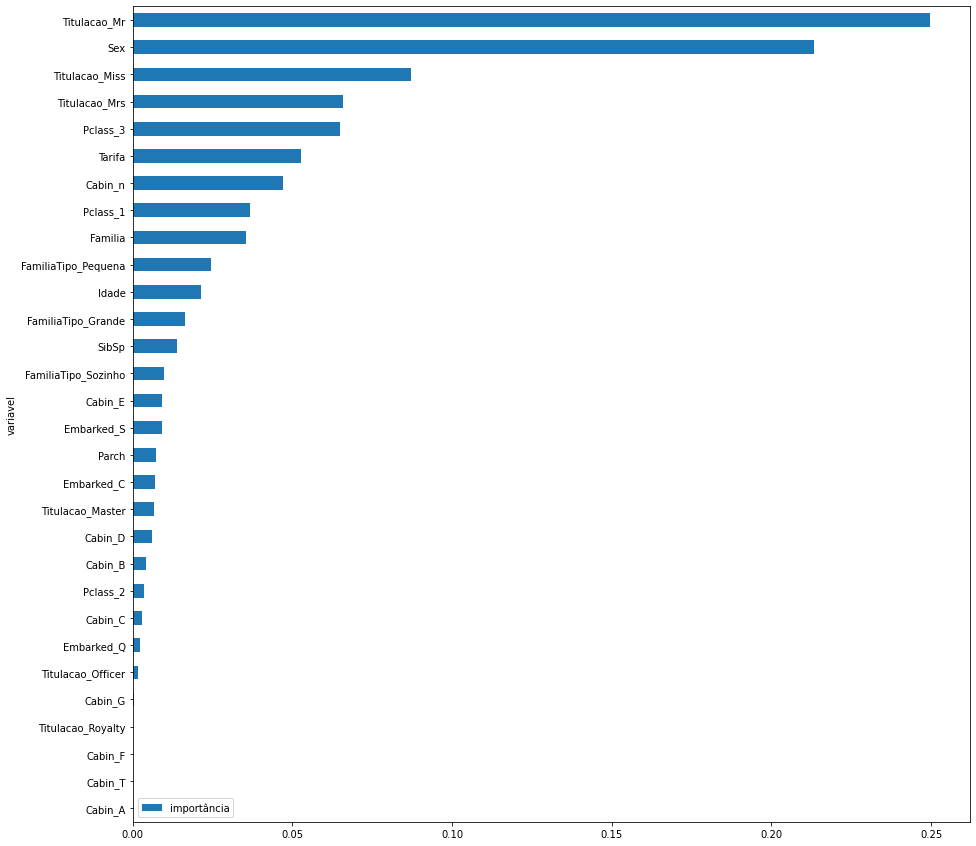

In [ ]:
#Traz de forma grafica para melhor vizualisção
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(15, 15));

#Selecionando as variáveis mais importantes

In [ ]:
from sklearn.feature_selection import SelectFromModel
#Seleciona a quantidade de variaveis
seletor = SelectFromModel(modelo_base, prefit = True, max_features = 11, threshold = -np.inf)#modelo base, prefit , max_features = maximo de variáveis

treino_reduzido = seletor.transform(treino)#filtra o conjunto de dados baseado no select
print(treino_reduzido.shape) 

teste_reduzido = seletor.transform(teste)#filtra o conjunto de dados para o teste
print(teste_reduzido.shape)

(891, 11)
(418, 11)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#Grid Search

In [ ]:
#modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold#a proporção das variáveis resposta são mantidas

#
from sklearn.model_selection import RandomizedSearchCV#procuração aleatória em validação cruzada
from sklearn.model_selection import GridSearchCV#procura em Grid em validação cruzada

In [ ]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [ ]:
modelo = KNeighborsClassifier()

validacao = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)# Validação utilizada

parametros = {'n_neighbors' : np.arange(1, 50, 2) }#parametros que vão variar na procura, deve ser passado como dicionario, associado a lista ou vetor que vai variar

grid_search = GridSearchCV(modelo, param_grid= parametros, #modelo usado, parametros que vão variar
                           scoring = 'accuracy', #procura da melhor métrica a ser apromorada 
                           cv = validacao,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(treino, targets)

Fitting 100 folds for each of 25 candidates, totalling 2500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_ #traz o melhor parâmetro encontrado
grid_search.cv_results_ #Traz todos os resultado alcançados
grid_search.cv_results_['mean_test_score']#.mean()#traz as médias dos knn(1,3,5,7,...,49)

array([0.74791511, 0.79258302, 0.80436954, 0.80415356, 0.80090637,
       0.80449313, 0.79630337, 0.79607615, 0.79899501, 0.79966542,
       0.80168664, 0.8085231 , 0.81042697, 0.81021848, 0.81313483,
       0.8121236 , 0.81066542, 0.81066292, 0.80909114, 0.80651685,
       0.80449563, 0.8041623 , 0.80404744, 0.80292884, 0.80135081])

#Definindo como uma função para fazer o grid

In [ ]:
def SearchKNN(treino, targets, tipo = 'tudo'): #Função para escolher entre busca Grid e Randomize
    parametros = {   
                 'n_neighbors' : np.arange(1, 50, 2)
                 }

    modelo = KNeighborsClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

    if tipo == 'tudo':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS
    elif tipo == 'aleatorio':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 10, verbose = 1, n_jobs = -1)#n_iter = quantas tentativas aleatórias ele ira tentar
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor

knn = SearchKNN(treino_reduzido, targets, tipo = 'aleatorio')


Fitting 100 folds for each of 10 candidates, totalling 1000 fits

Acuracia: 0.8165
Melhores parâmetros: {'n_neighbors': 33}



In [ ]:
def GridSearchRF(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'max_depth' : [2, 4, 6, 8, 10], #profundidade com 5 parametros
                 'n_estimators': [50, 100, 150], # Tamnaho da Floresta
                 'max_features': ['sqrt', 'auto', 'log2'], #tamanho do numero de colunas usados para montar a arvore
                 'min_samples_split': [2, 5, 10], #minimo de amostras no nó
                 'min_samples_leaf': [1, 3, 5], #minimo de amostras nas folhas
                 'bootstrap': [True, False] #se vai fazer boostrap dos dados
                 }

    modelo = RandomForestClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor_rf = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor_rf

rf = GridSearchRF(treino_reduzido, targets, tipo = 'tudo')


Fitting 10 folds for each of 810 candidates, totalling 8100 fits


KeyboardInterrupt: ignored